In [57]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
import ml_experiment as ml

In [59]:
data = pd.read_csv('./ATLAS_LC/signatures_8_encoded.csv', index_col=0)

In [60]:
objid = data['OBJID']
filt = data['filter']
y = data['CLASS']
x = data[['encode_{}'.format(i+1) for i in range(8)]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

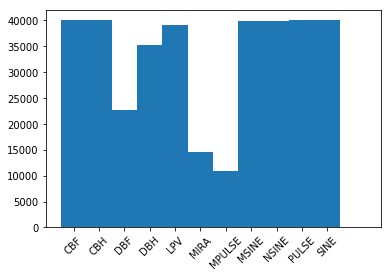

In [61]:
plt.figure(figsize=(6, 4))
plt.hist(y, bins=np.arange(13)-0.5)
plt.xticks(rotation=45)

In [62]:
y = y.as_matrix()

/home/bruno/.virtualenvs/iPTF/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.90, random_state=17)

In [64]:
len(X_train)

36253

This first split is to develop - final testing

After this a k-fold CV inside develop sample is going to bring us to destination

## Feature selection on encoded vector

In [65]:
sel = feature_selection.VarianceThreshold(threshold=(.9 * (1 - .9)))
X_sel = sel.fit_transform(X_train)

In [66]:
X_sel.shape

(36253, 8)

In [67]:
sel = feature_selection.GenericUnivariateSelect(score_func=feature_selection.mutual_info_classif, param=55)
X_new = sel.fit_transform(X_sel, y_train)
X_new.shape

(36253, 4)

In [ ]:
result = ml.experiment(clf=RandomForestClassifier(max_features=3, n_estimators=600, n_jobs=4), 
              x=X_new, y=y_train, nfolds=4, printing=True, multiclass=True)

In [ ]:
import gc
gc.collect()